In [3]:
%load_ext autoreload
%autoreload 2
from pylexique import Lexique383
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
import data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
train_data = pd.read_csv("data/train.csv")

In [13]:
train_data = data.preprocess(train_data, create_keywords=True)

In [14]:
def feature_abbrev(dt):
    LEXIQUE = Lexique383()
    lexique = set(LEXIQUE.lexique.keys())
    dt["abrev"] = dt["text"].apply(lambda s: data.count_abreviations_func(s, lexique))
    return dt

In [9]:
display(train_data)

,text,retweets_count,favorites_count,followers_count,statuses_count,friends_count,mentions,urls,verified,hashtags,...,TweetID,url_count,text_len,hashtags_count,day,hour,Macron,Zemmour,Melenchon,rt
0,rt refarcir macron ans nom prépare,3,0,3682,453535,3628,[],[],0,[],...,832509,0.0,34,0.0,11,5,True,False,False,True
1,populaire,0,0,86,1016,284,[],[],0,[],...,1388011,0.0,9,0.0,19,12,False,False,False,False
2,faut dégager cinglé,3,1,1944,28234,1995,[],[],0,[],...,63896,0.0,19,0.0,15,18,False,False,False,False
3,enseignants mettre prescriptions président rép...,0,0,1,1072,0,[],['https://t.co/rytlted08g'],0,[],...,979251,1.0,123,0.0,14,11,False,False,False,False
4,mafieuse oppressive macron,0,0,13957,25311,10841,[],[],0,[],...,1040049,0.0,26,0.0,14,11,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353964,gonflette tour raciste frustré,0,0,34,1509,55,[],['https://t.co/pma33zhslx'],0,[],...,142573,1.0,30,0.0,16,13,False,False,False,False
353965,france caste crapuleuse encadrée gangsters irr...,0,0,89,11166,127,[],[],0,[],...,240866,0.0,69,0.0,12,8,False,False,False,False
353966,eric zemmour français berbère,3,0,1888,712,3086,[],[],0,[],...,1173763,0.0,29,0.0,18,12,False,True,False,False
353967,gauchistes dépression pq,0,0,139,486,320,[],[],0,[],...,929182,0.0,24,0.0,11,8,False,False,False,False


In [15]:
# select useful columns
train_data_filtered = train_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)

In [16]:

# train_data_filtered = train_data.loc[:, ["retweets_count","favorites_count","followers_count","statuses_count","friends_count",
#                                  "hashtags_count","hour","verified","url_count","text_len","rt","Macron","Zemmour","Melenchon"]]


X_train, X_eval, y_train, y_eval = train_test_split(train_data_filtered.drop("retweets_count", axis=1),
                                                    train_data_filtered["retweets_count"],
                                                    random_state=42, test_size=0.1)

# Standardize the data
normal_columns = train_data_filtered.drop(["hour", "verified", "Macron", "Zemmour", "Melenchon", "url_count", "rt", "retweets_count"], axis=1).columns
mu, sigma = X_train[normal_columns].mean(axis=0), X_train[normal_columns].std(axis=0)
X_train.loc[:, normal_columns] = (X_train[normal_columns] - mu) / sigma
X_eval.loc[:, normal_columns] = (X_eval[normal_columns] - mu) / sigma

In [17]:
display(X_train)

,favorites_count,followers_count,statuses_count,friends_count,verified,url_count,text_len,hashtags_count,day,hour,Macron,Zemmour,Melenchon,rt
286184,-0.055089,-0.077844,-0.421579,-0.525943,0,0.0,-0.456928,-0.384757,0.177303,19,False,False,False,False
83577,-0.055089,-0.067811,-0.070867,0.325185,0,1.0,0.624187,-0.384757,0.177303,8,False,False,False,False
165861,-0.055089,-0.077714,-0.417499,-0.523552,0,0.0,-0.601077,-0.384757,-0.728852,17,False,False,False,False
314938,-0.045624,-0.071025,-0.322850,-0.292042,0,0.0,0.431989,-0.384757,0.479354,13,False,False,False,False
301981,-0.052722,-0.076427,-0.310814,-0.221115,0,1.0,1.945550,2.208030,-1.030903,5,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,-0.055089,-0.074569,-0.374245,-0.252993,0,1.0,-0.216681,-0.384757,1.385508,9,False,False,False,False
259178,-0.055089,-0.067190,-0.409402,-0.420349,0,1.0,-0.384854,-0.384757,0.177303,16,True,False,False,False
131932,-0.055089,-0.062559,-0.417992,0.397706,0,1.0,0.480038,-0.384757,0.781405,17,False,False,False,False
146867,-0.055089,-0.076515,-0.175583,-0.372135,0,1.0,1.705302,-0.384757,-0.426800,9,False,True,False,False


In [9]:
import tensorflow as tf

In [31]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(20, activation='relu'),
  tf.keras.layers.Dense(1),
])

In [32]:
# import tensorflow_addons as tfa
# optimizer = tfa.optimizers.AdamW(learning_rate=1e-3, weight_decay=1e-4)
# model.compile(optimizer=optimizer, loss='mae')

In [33]:
model.compile(optimizer="adam", loss='mae')

In [34]:
history = model.fit(X_train.values.astype(np.float32), y_train.values.astype(np.float32), epochs=190, batch_size=1024,
         validation_data=(X_eval.values.astype(np.float32), y_eval.values.astype(np.float32)), shuffle=True)

Epoch 1/190
312/312 [==============================] - 2s 4ms/step - loss: 15.6001 - val_loss: 14.9657
Epoch 2/190
312/312 [==============================] - 1s 4ms/step - loss: 10.9860 - val_loss: 7.3418
Epoch 3/190
312/312 [==============================] - 2s 5ms/step - loss: 7.3329 - val_loss: 7.0410
Epoch 4/190
312/312 [==============================] - 1s 3ms/step - loss: 7.1491 - val_loss: 6.9493
Epoch 5/190
312/312 [==============================] - 1s 3ms/step - loss: 7.0774 - val_loss: 6.9505
Epoch 6/190
312/312 [==============================] - 2s 6ms/step - loss: 7.0153 - val_loss: 6.9090
Epoch 7/190
312/312 [==============================] - 1s 3ms/step - loss: 6.9624 - val_loss: 6.8122
Epoch 8/190
312/312 [==============================] - 1s 3ms/step - loss: 6.9091 - val_loss: 6.7565
Epoch 9/190
312/312 [==============================] - 1s 3ms/step - loss: 6.8702 - val_loss: 6.7746
Epoch 10/190
312/312 [==============================] - 1s 3ms/step - loss: 6.8228 - val

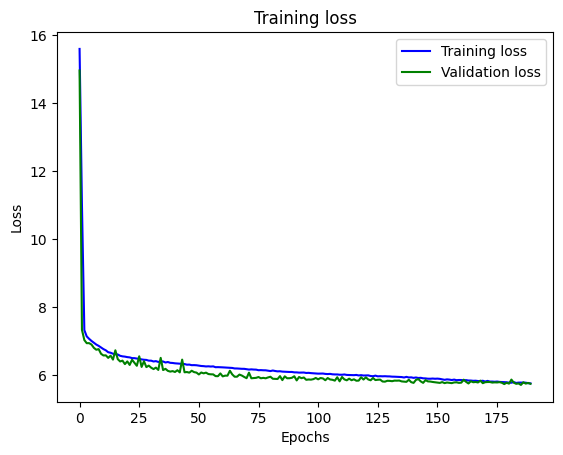

In [35]:
plt.plot(history.epoch, history.history["loss"], 'b', label='Training loss')
plt.plot(history.epoch, history.history["val_loss"], 'g', label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
model.evaluate(X_eval.values.astype(np.float32),  y_eval.values.astype(np.float32), verbose=2)

1107/1107 - 1s - loss: 5.7562 - 1s/epoch - 1ms/step


5.75615119934082

In [37]:
pred = model.predict(X_train.values.astype(np.float32))
print(pred)

[[ 4.4286847e-03]
 [ 1.8070495e+00]
 [ 6.7651272e-03]
 ...
 [ 1.6769657e+00]
 [-2.5902390e-03]
 [ 2.6262755e+00]]


In [38]:
# plt.scatter(X_train["favorites_count"], model.predict(X_train))
# plt.scatter(X_train["favorites_count"], y_train.values.astype(np.float32))

In [39]:
# evaluation

eval_data = pd.read_csv("data/embeddings/evaluation_dim_32.csv")
tweets = eval_data["TweetID"]

In [40]:
eval_data["url_count"] = eval_data["urls"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["text_len"] = eval_data["text"].apply(lambda s: len(s))
eval_data["hashtags_count"] = eval_data["hashtags"].apply(lambda s: s[1:-1].count("\'")/2)
eval_data["day"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).day)
eval_data["hour"] = eval_data["timestamp"].apply(lambda t: datetime.utcfromtimestamp(t/1000).hour)
eval_data["Macron"] =  eval_data["text"].apply(lambda s: ("macron" in s.lower().split()))
eval_data["Zemmour"] =  eval_data["text"].apply(lambda s: ("zemmour" in s.lower().split()))
eval_data["Melenchon"] =  eval_data["text"].apply(lambda s: ("melenchon" in s.lower().split()))
eval_data["rt"] =  eval_data["text"].apply(lambda s: ("rt" in s.lower().split()))
eval_data["abrev"] = eval_data["text"].apply(lambda s: data.count_abreviations_func(s, lexique))

# print("sentiment analysis...")
# eval_data["compound"] =  eval_data["text"].apply(lambda s: sia.polarity_scores(s)['compound'])

eval_data = eval_data.drop(["text", "urls", "mentions", "hashtags", "timestamp", "TweetID"], axis=1)

# normalize
eval_data.loc[:, normal_columns] = (eval_data.loc[:, normal_columns] - mu) / sigma

print(eval_data)

pred = model.predict(eval_data.values.astype(np.float32))

print(pred)

# output normalization
for i,p in enumerate(pred):
    if p<0: pred[i] = 0

        Unnamed: 0  favorites_count  followers_count  statuses_count  \
0        -1.731691        -0.055089        -0.077561       -0.384487   
1        -1.731681        -0.055089        -0.076250       -0.130940   
2        -1.731672        -0.047990        -0.073569       -0.308274   
3        -1.731662        -0.052722        -0.071378       -0.197070   
4        -1.731652        -0.055089        -0.076932       -0.241396   
...            ...              ...              ...             ...   
117985   -0.577125        -0.055089        -0.077871       -0.421834   
117986   -0.577115        -0.055089        -0.075036       -0.076371   
117987   -0.577105        -0.040891        -0.074347       -0.403582   
117988   -0.577095        -0.055089        -0.077867       -0.423504   
117989   -0.577086        -0.055089        -0.075760       -0.373401   

        friends_count  verified         0         1         2         3  ...  \
0           -0.451430         0  1.059738  0.136526 -1.

In [41]:
with open("data/predictions.csv", 'w') as f:
    writer = csv.writer(f)
    writer.writerow(["TweetID", "retweets_count"])
    for index, prediction in enumerate(pred):
        writer.writerow([str(tweets[index]) , str(int(prediction))])